<a href="https://colab.research.google.com/github/ayd13/Machine-learning-projects/blob/master/Term_Project_Ahmed_Eldib_Load_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# initial needed packages
 
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
random.seed(42)
 
#Mount your Google drive so you can read them easilu
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import fileinput

filePath  ='/content/gdrive/My Drive/Machine Learning/ML Class UofT/Term_Project/BNG_credit-g.csv'

In [ ]:
# Create dataframe
import pandas as pd

data = pd.read_csv(filePath )

In [ ]:
# all other needed packages
 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stats
from sklearn.model_selection import train_test_split
# the scaler - for min-max scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import recall_score
from sklearn.pipeline import Pipeline
 
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
 
from sklearn import tree
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# install feature-engine package
! pip install feature-engine

     |████████████████████████████████| 8.7MB 5.5MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# for one hot encoding with feature-engine
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

In [ ]:
data.shape

(1000000, 21)

**Attribute Information:**

*Attribute 1:* (qualitative)

checking_status: Status of existing checking account
- < 0 DM,
- 0 <= ... < 200 DM, 
- ... >= 200 DM / salary assignments for at least 1 year, 
- No checking account)

*Duration* in month

*Attribute 3:* (qualitative)

Credit history
- No credits taken/ all credits paid back duly
- All credits at this bank paid back duly
- Existing credits paid back duly till now
- Delay in paying off in the past
- Critical account/ other credits existing (not at this bank)

*Attribute 4:* (qualitative)

Purpose
- Car (new)
- Car (used)
- Furniture/equipment
- Radio/television
- Domestic appliances
- Repairs
- Education
- (vacation - does not exist?)
- Retraining
- Business
- Others

*Attribute 5:* (numerical)

credit_amount: Credit amount

*Attibute 6:* (qualitative)

savings_status: Savings account/bonds
- ... < 100 DM
- 100 <= ... < 500 DM
- 500 <= ... < 1000 DM
- .. >= 1000 DM
- unknown/ no savings account

*Attribute 7:* (qualitative)

Employment: Present employment since
- unemployed
- ... < 1 year
- 1 <= ... < 4 years
- 4 <= ... < 7 years
- .. >= 7 years

*Attribute 8:* (numerical)

installment_commitment: Installment rate in percentage of disposable income

*Attribute 9:* (qualitative)

personal_status: Personal status and sex
- male : divorced / separated
- female : divorced / separated / married
- male : single
- male : married/widowed
- female : single

*Attribute 10:* (qualitative)

Other_Parties: Other debtors / guarantors
- none
- co-applicant
- guarantor

*Attribute 11:* (numerical)

residence_since: Present residence since

*Attribute 12:* (qualitative)

property_magnitude
- real estate
- if not A121 : building society savings agreement/ life insurance
- if not A121/A122 : car or other, not in attribute 6
- unknown / no property

*Attribute 13:* (numerical)

Age: Age in years

*Attribute 14:* (qualitative)

Other_payments: Other installment plans
- bank
- stores
- none

*Attribute 15: *(qualitative)

Housing
- rent
- own
- for free

*Attribute 16:* (numerical)

existing_credits
Number of existing credits at this bank

*Attribute 17:* (qualitative)

Job
- unemployed/ unskilled - non-resident
- unskilled - resident
- skilled employee / official
- management/ self-employed/
- highly qualified employee/ officer

*Attribute 18:* (numerical)

num_dependents
Number of people being liable to provide maintenance for

*Attribute 19:* (qualitative)

Own_Telephone
- none
- yes, registered under the customers name

*Attribute 20:* (qualitative)

foreign worker
- yes
- no

*Attribute 21: *

Class
- good
- bad

In [ ]:
data.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,12.046734,'no credits/all paid',business,8399.322480,'no known savings',>=7,2,'male single',none,4,'no known property',32.520153,none,'for free',1,skilled,2,none,yes,bad
1,'no checking',7.611170,'no credits/all paid','new car',920.413947,<100,1<=X<4,2,'male single',none,4,'life insurance',23.258447,none,own,1,skilled,1,none,no,good
2,'no checking',16.926853,'existing paid',radio/tv,300.381585,<100,<1,4,'male single',none,1,'real estate',40.479525,none,own,1,skilled,1,yes,yes,good
3,<0,43.088352,'delayed previously','new car',7860.320514,<100,unemployed,4,'female div/dep/mar',none,2,'no known property',28.875083,none,own,2,skilled,1,yes,yes,bad
4,>=200,52.761614,'critical/other existing credit','new car',6839.412110,<100,4<=X<7,4,'male single',none,3,car,21.893383,none,own,2,skilled,1,yes,yes,good
5,<0,41.266553,'existing paid',business,3890.129693,<100,1<=X<4,4,'male single',none,4,'life insurance',37.249188,none,own,1,'unskilled resident',1,none,yes,bad
6,0<=X<200,17.271734,'existing paid',radio/tv,2037.886566,<100,<1,4,'female div/dep/mar',none,2,car,29.241406,bank,own,1,'unskilled resident',1,none,yes,bad
7,<0,25.135795,'existing paid',radio/tv,1454.798969,<100,1<=X<4,4,'female div/dep/mar',none,4,'real estate',29.826403,none,own,1,'unskilled resident',1,none,yes,good
8,0<=X<200,23.160591,'existing paid',radio/tv,3563.881964,<100,4<=X<7,1,'male single',guarantor,2,'real estate',23.271047,none,own,1,'unskilled resident',2,none,no,good
9,<0,44.744560,'existing paid',radio/tv,11858.489336,<100,1<=X<4,4,'male div/sep',none,2,'no known property',26.821644,none,'for free',1,'unskilled resident',1,none,yes,bad


In [ ]:
data.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,20.891879,3210.124716,2.953633,2.836807,35.633956,1.426606,1.157826
std,12.055036,2779.716041,1.120668,1.104919,11.312681,0.611262,0.364578
min,-1.543527,-5997.669542,1.000000,1.000000,16.312481,1.000000,1.000000
25%,11.968091,1389.640085,2.000000,2.000000,27.119236,1.000000,1.000000
50%,18.117446,2285.628741,3.000000,3.000000,33.111811,1.000000,1.000000
75%,24.928179,3825.210598,4.000000,4.000000,40.986604,2.000000,1.000000
max,78.343283,22001.953049,4.000000,4.000000,90.236360,4.000000,2.000000


In [ ]:
# check if any column has null value

vars_with_na = [var for var in data.columns if data[var].isnull().mean() > 0]
vars_with_na

[]

In [ ]:
# find categorical variables
# those of type 'Object' in the dataset
features_categorical = [c for c in data.columns if data[c].dtypes=='O']
features_categorical

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker',
 'class']

In [ ]:
# find numerical variables
# those different from object
features_numerical = [c for c in data.columns if data[c].dtypes!='O']
features_numerical

['duration',
 'credit_amount',
 'installment_commitment',
 'residence_since',
 'age',
 'existing_credits',
 'num_dependents']

In [ ]:
# Get distinct values of all catagorical columns

for col in features_categorical:
   print ('\nunique values for %s'%col)
   print (data[col].unique())


unique values for checking_status
['<0' "'no checking'" '>=200' '0<=X<200']

unique values for credit_history
["'no credits/all paid'" "'existing paid'" "'delayed previously'"
 "'critical/other existing credit'" "'all paid'"]

unique values for purpose
['business' "'new car'" 'radio/tv' 'furniture/equipment' "'used car'"
 'repairs' 'retraining' 'education' 'other' "'domestic appliance'"
 'vacation']

unique values for savings_status
["'no known savings'" '<100' '500<=X<1000' '100<=X<500' '>=1000']

unique values for employment
['>=7' '1<=X<4' '<1' 'unemployed' '4<=X<7']

unique values for personal_status
["'male single'" "'female div/dep/mar'" "'male div/sep'" "'male mar/wid'"
 "'female single'"]

unique values for other_parties
['none' 'guarantor' "'co applicant'"]

unique values for property_magnitude
["'no known property'" "'life insurance'" "'real estate'" 'car']

unique values for other_payment_plans
['none' 'bank' 'stores']

unique values for housing
["'for free'" 'own' 'rent']


In [ ]:
# value count for all catagorical columns by values

for c in features_categorical:
    print ("---- %s ---" % c)
    print (data[c].value_counts())

---- checking_status ---
'no checking'    394051
<0               272999
0<=X<200         269039
>=200             63911
Name: checking_status, dtype: int64
---- credit_history ---
'existing paid'                     528454
'critical/other existing credit'    292863
'delayed previously'                 88442
'all paid'                           49385
'no credits/all paid'                40856
Name: credit_history, dtype: int64
---- purpose ---
radio/tv                278087
'new car'               232441
furniture/equipment     179990
'used car'              102886
business                 97087
education                50167
repairs                  22858
'domestic appliance'     12810
other                    12781
retraining                9944
vacation                   949
Name: purpose, dtype: int64
---- savings_status ---
<100                  593748
'no known savings'    184016
100<=X<500            104794
500<=X<1000            66015
>=1000                 51427
Name: savings_

In [ ]:
# we change target column (class) values to numerical and data type too 
# we will replace out targer (class) with 1 for bad and 0 for good
# we make 1 for bad because we want to track recall 

data["class"]= data["class"].replace('bad', 1)
data["class"]= data["class"].replace('good', 0)
data['class'].unique()

array([1, 0])

In [ ]:
# Now we will change (class) column to numeric
data["class"] = pd.to_numeric(data["class"])

In [ ]:
# now lets meke sure what is categorica and what is numerical
features_categorical_casted = [c for c in data.columns if data[c].dtypes=='O']
features_categorical_casted

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker']

In [ ]:
features_numerical_casted = [c for c in data.columns if data[c].dtypes!='O']
features_numerical_casted

['duration',
 'credit_amount',
 'installment_commitment',
 'residence_since',
 'age',
 'existing_credits',
 'num_dependents',
 'class']

In [ ]:
# looks like we have 13 catagorical columns with no missing data

In [ ]:
# Now let's see unique numerical values (only some it they are too much)
for col in features_numerical_casted:
   print ('\distinct value count for %s'%col)
   print (data[col].unique())

\distinct value count for duration
[12.046734  7.61117  16.926853 ... 20.49198  16.534777 12.204136]
\distinct value count for credit_amount
[8399.32248   920.413947  300.381585 ...  696.655676 1961.985722
 1096.40972 ]
\distinct value count for installment_commitment
[2 4 1 3]
\distinct value count for residence_since
[4 1 2 3]
\distinct value count for age
[32.520153 23.258447 40.479525 ... 22.065572 26.537211 26.267923]
\distinct value count for existing_credits
[1 2 3 4]
\distinct value count for num_dependents
[2 1]
\distinct value count for class
[1 0]


In [ ]:
# Now let's see number of distinct catagorical values
for col in features_categorical_casted:
   print ('\distinct value count for %s'%col)
   print (data[col].nunique())

\distinct value count for checking_status
4
\distinct value count for credit_history
5
\distinct value count for purpose
11
\distinct value count for savings_status
5
\distinct value count for employment
5
\distinct value count for personal_status
5
\distinct value count for other_parties
3
\distinct value count for property_magnitude
4
\distinct value count for other_payment_plans
3
\distinct value count for housing
3
\distinct value count for job
4
\distinct value count for own_telephone
2
\distinct value count for foreign_worker
2


In [ ]:
# although we have 13 categorical values (a lot) we only have few distinct values for each one (except of purpose has 11 unique values)
# we will have to create 56 dummies

In [ ]:
# Now let's see number of distinct numerical values
for col in features_numerical_casted:
   print ('\distinct value count for %s'%col)
   print (data[col].nunique())

\distinct value count for duration
971857
\distinct value count for credit_amount
999900
\distinct value count for installment_commitment
4
\distinct value count for residence_since
4
\distinct value count for age
983864
\distinct value count for existing_credits
4
\distinct value count for num_dependents
2
\distinct value count for class
2


## Let's try Data Transformation for 'duration', 'credit_amount' and 'age'

In [ ]:
# create different dataframes for different transformation
# we are trying to transforme these numerical values (in below 3 columns) to be linear.
data_num = data[['duration', 'credit_amount', 'age']]
data_num_sqrt = data_num
data_num_cbrt = data_num
data_num_log = data_num
data_num_boxcox = data_num
data_num_yeojohnson = data_num

data_num.head()

,duration,credit_amount,age
0,12.046734,8399.322480,32.520153
1,7.611170,920.413947,23.258447
2,16.926853,300.381585,40.479525
3,43.088352,7860.320514,28.875083
4,52.761614,6839.412110,21.893383


In [ ]:
# lets plot numerical values and see how it look like

# function to create histogram, Q-Q plot and boxplot

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()


duration


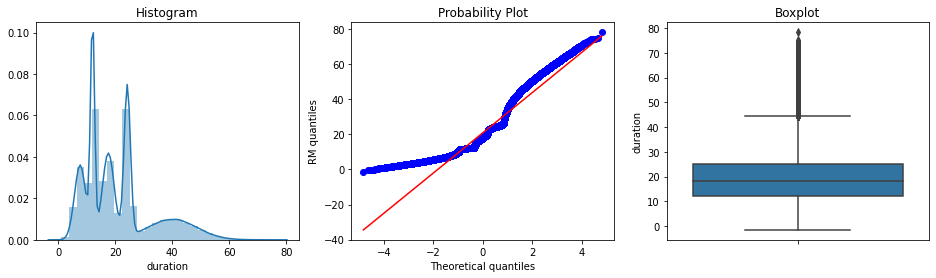

credit_amount


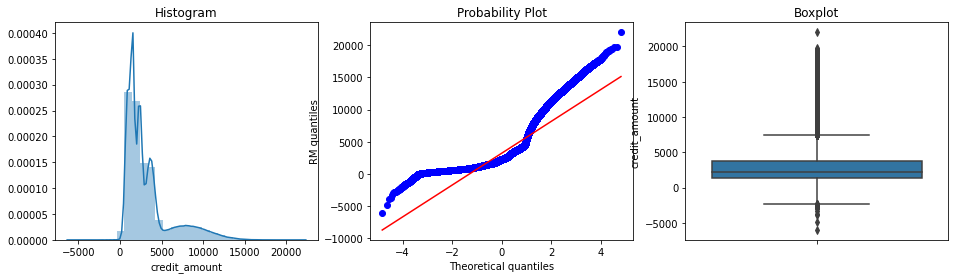

age


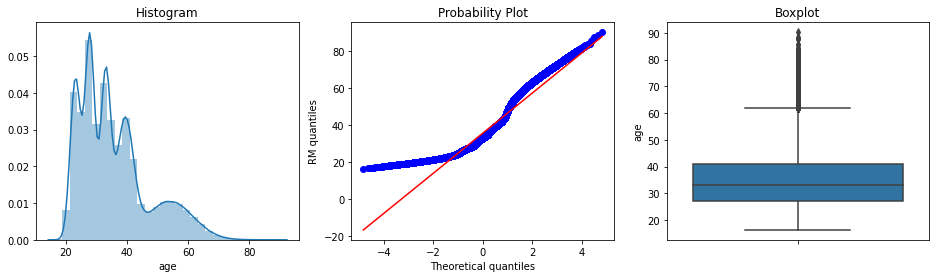

In [ ]:
# Let's see how this data look like
for column in data_num:
    print(column)
    diagnostic_plots(data_num, column)

In [ ]:
# lets try to transform data_num to see if we can make it linear

data_num_log['age'] =  np.log(data_num['age']) 
data_num_log['credit_amount'] =  np.log(data_num['credit_amount'])
data_num_log['duration'] =  np.log(data_num['duration'])

data_num_sqrt['age'] =  np.sqrt(data_num['age']) 
data_num_sqrt['credit_amount'] =  np.sqrt(data_num['credit_amount'])
data_num_sqrt['duration'] =  np.sqrt(data_num['duration'])

data_num_cbrt['age'] =  np.cbrt(data_num['age']) 
data_num_cbrt['credit_amount'] =  np.cbrt(data_num['credit_amount'])
data_num_cbrt['duration'] =  np.cbrt(data_num['duration'])

data_num_boxcox['age'], param =  stats.boxcox(data_num['age']) 
data_num_boxcox['credit_amount'], param=  stats.boxcox(data_num['credit_amount'])
data_num_boxcox['duration'], param =  stats.boxcox(data_num['duration'])

data_num_yeojohnson['age'], param =  stats.yeojohnson(data_num['age']) 
data_num_yeojohnson['credit_amount'], param=  stats.yeojohnson(data_num['credit_amount'])
data_num_yeojohnson['duration'], param =  stats.yeojohnson(data_num['duration'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/l

duration


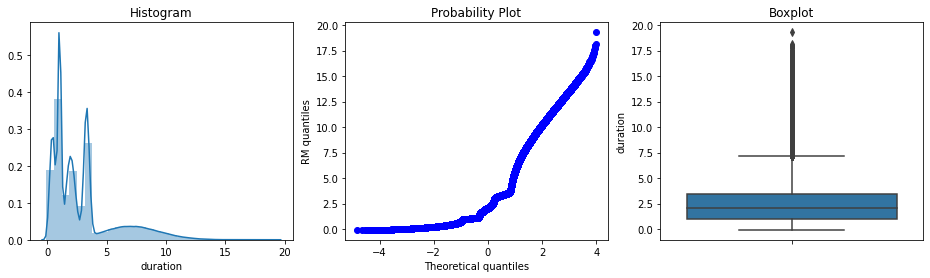

credit_amount


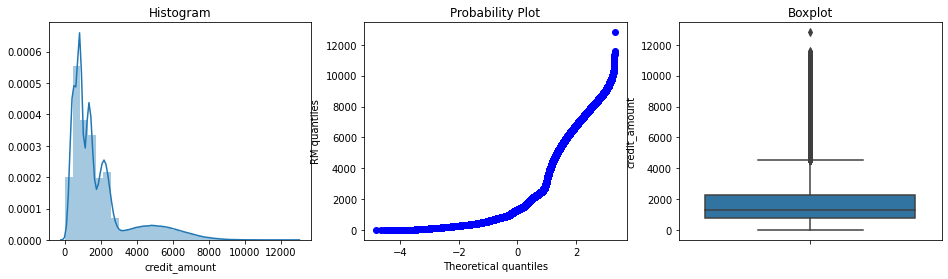

age


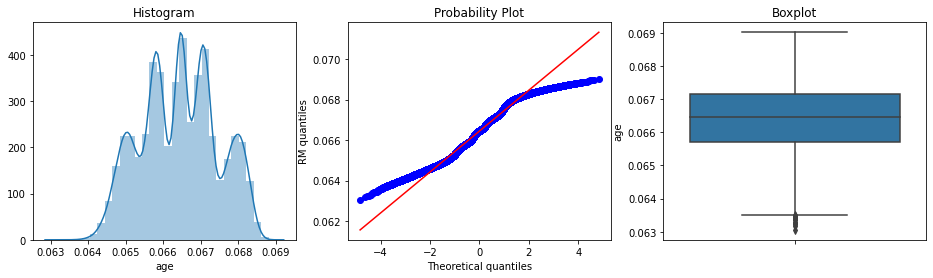

In [ ]:
# let's plot transformed data (is it more linear in any of the 5 transformation?)

for column in data_num_sqrt:
    print(column)
    diagnostic_plots(data_num_sqrt, column)

duration


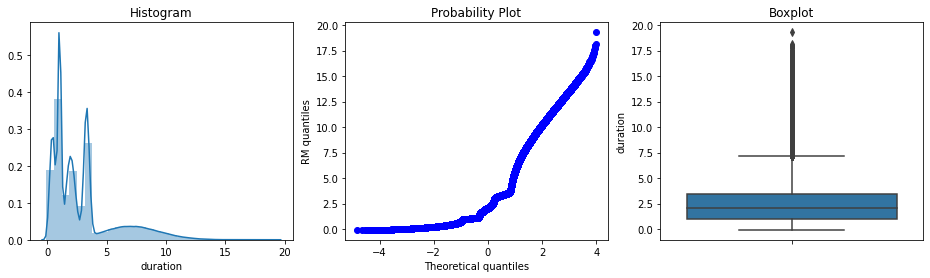

credit_amount


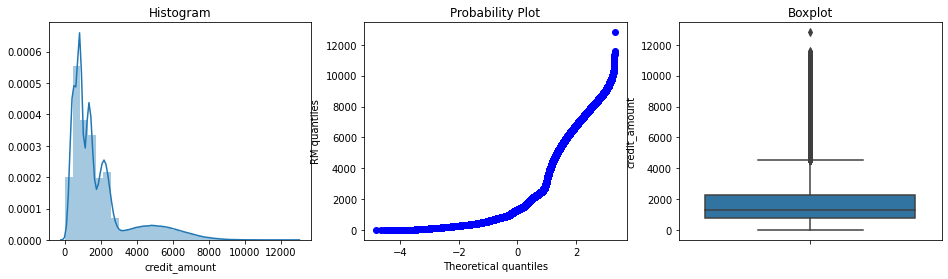

age


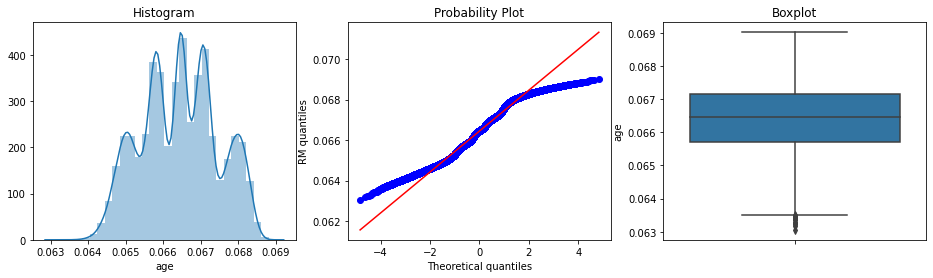

In [ ]:
for column in data_num_cbrt:
    print(column)
    diagnostic_plots(data_num_cbrt, column)

duration


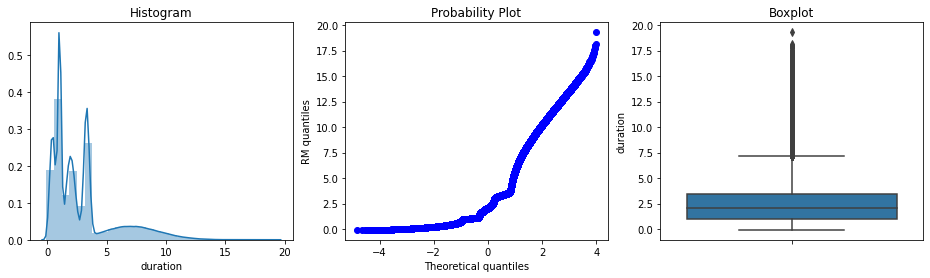

credit_amount


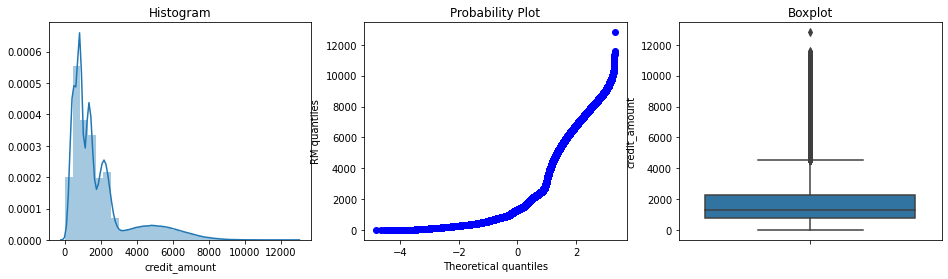

age


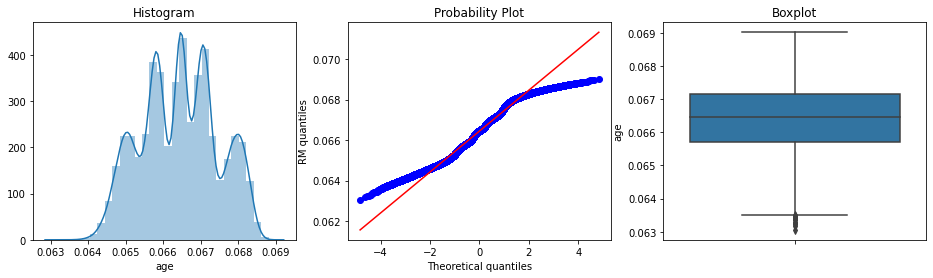

In [ ]:
for column in data_num_log:
    print(column)
    diagnostic_plots(data_num_log, column)

duration


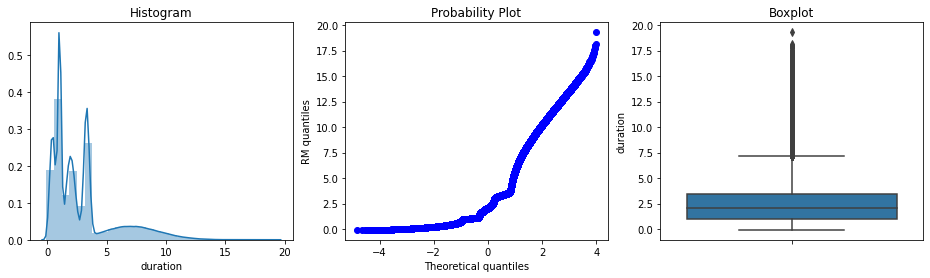

credit_amount


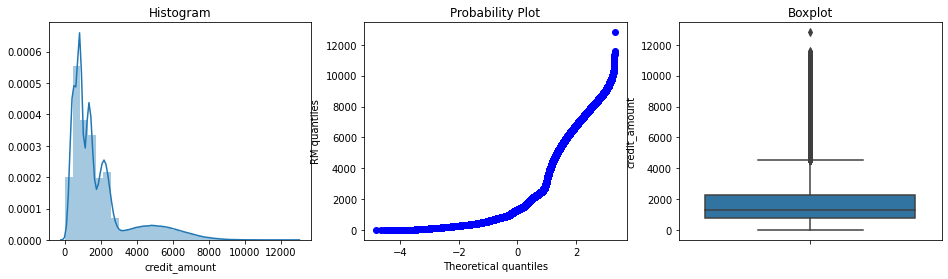

age


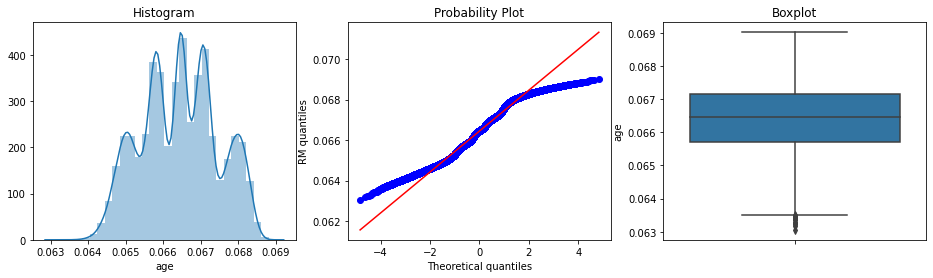

In [ ]:
for column in data_num_yeojohnson:
    print(column)
    diagnostic_plots(data_num_yeojohnson, column)

duration


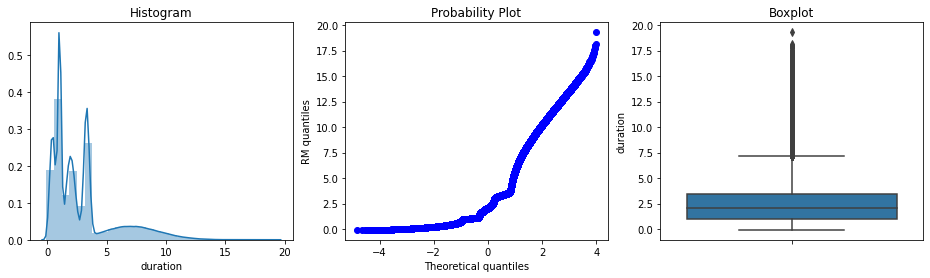

credit_amount


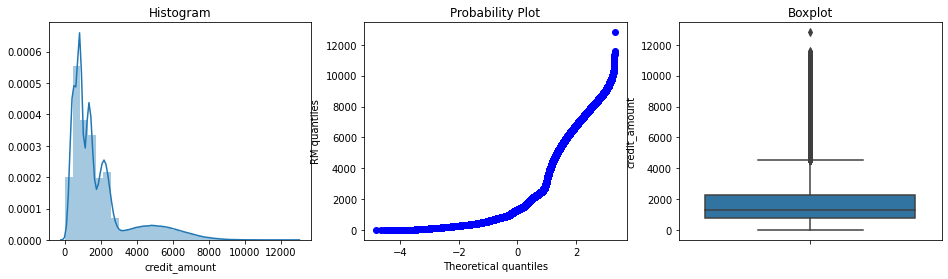

age


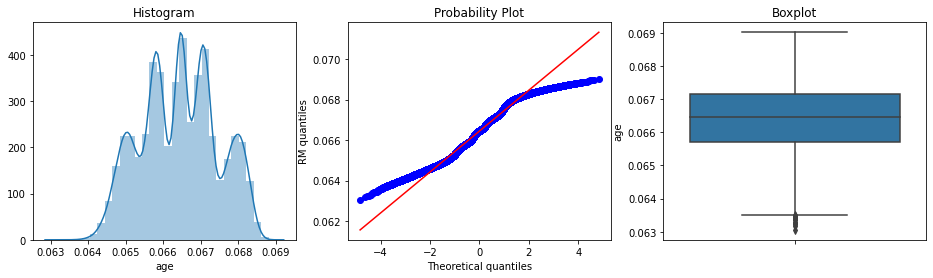

In [ ]:
for column in data_num_boxcox:
    print(column)
    diagnostic_plots(data_num_boxcox, column)

In [ ]:
# none of the transformation worked to make any of the transformaed values more linear, 
# we will not apply any of it as data transformations. 

In [ ]:
# We have to split data first.

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['checking_status','credit_history','purpose','savings_status','employment','personal_status','other_parties','property_magnitude','other_payment_plans','housing',
            'job','own_telephone','foreign_worker','duration','credit_amount','installment_commitment','residence_since','age','existing_credits','num_dependents']],  # predictors
    data['class'],  # target 
    stratify= data['class'], # make sure rare value are both training and testing data
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((700000, 20), (300000, 20))

In [ ]:
# with all catagorical values, we need One Hot Encoding

ohe_enc = OneHotCategoricalEncoder(
    top_categories=None,
    variables= features_categorical_casted, # we can select which variables to encode
    drop_last=False) # to return k-1, false to return k


ohe_enc.fit(X_train.fillna('Missing'))

OneHotCategoricalEncoder(drop_last=False, top_categories=None,
                         variables=['checking_status', 'credit_history',
                                    'purpose', 'savings_status', 'employment',
                                    'personal_status', 'other_parties',
                                    'property_magnitude', 'other_payment_plans',
                                    'housing', 'job', 'own_telephone',
                                    'foreign_worker'])

In [ ]:
X_train_enc = ohe_enc.transform(X_train.fillna('Missing'))

X_train_enc.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_0<=X<200,checking_status_>=200,checking_status_'no checking',checking_status_<0,credit_history_'critical/other existing credit',credit_history_'existing paid',credit_history_'no credits/all paid',credit_history_'delayed previously',credit_history_'all paid',purpose_'used car',purpose_education,purpose_radio/tv,purpose_furniture/equipment,purpose_'new car',purpose_repairs,purpose_business,purpose_'domestic appliance',purpose_retraining,purpose_other,purpose_vacation,savings_status_<100,savings_status_100<=X<500,savings_status_>=1000,savings_status_'no known savings',savings_status_500<=X<1000,employment_>=7,employment_1<=X<4,employment_4<=X<7,employment_<1,employment_unemployed,personal_status_'male single',personal_status_'female div/dep/mar',personal_status_'male mar/wid',personal_status_'male div/sep',personal_status_'female single',other_parties_none,other_parties_guarantor,other_parties_'co applicant',property_magnitude_'real estate',property_magnitude_car,property_magnitude_'life insurance',property_magnitude_'no known property',other_payment_plans_none,other_payment_plans_bank,other_payment_plans_stores,housing_own,housing_rent,housing_'for free',job_skilled,job_'unskilled resident',job_'unemp/unskilled non res',job_'high qualif/self emp/mgmt',own_telephone_none,own_telephone_yes,foreign_worker_yes,foreign_worker_no
638674,8.199765,1057.148717,4,4,31.398947,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
360260,47.034261,6217.771041,4,2,32.296264,3,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
406211,25.500298,2386.366099,2,2,28.714024,2,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0
887221,17.014403,1553.674333,4,3,31.648992,2,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
515161,7.200952,3143.463542,1,4,30.095762,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0


In [ ]:
X_train_enc.shape

(700000, 63)

**One Hot Encode**

In [ ]:
# Now we should encode test data as well ...

X_test_enc = ohe_enc.transform(X_test.fillna('Missing'))
X_test_enc.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_0<=X<200,checking_status_>=200,checking_status_'no checking',checking_status_<0,credit_history_'critical/other existing credit',credit_history_'existing paid',credit_history_'no credits/all paid',credit_history_'delayed previously',credit_history_'all paid',purpose_'used car',purpose_education,purpose_radio/tv,purpose_furniture/equipment,purpose_'new car',purpose_repairs,purpose_business,purpose_'domestic appliance',purpose_retraining,purpose_other,purpose_vacation,savings_status_<100,savings_status_100<=X<500,savings_status_>=1000,savings_status_'no known savings',savings_status_500<=X<1000,employment_>=7,employment_1<=X<4,employment_4<=X<7,employment_<1,employment_unemployed,personal_status_'male single',personal_status_'female div/dep/mar',personal_status_'male mar/wid',personal_status_'male div/sep',personal_status_'female single',other_parties_none,other_parties_guarantor,other_parties_'co applicant',property_magnitude_'real estate',property_magnitude_car,property_magnitude_'life insurance',property_magnitude_'no known property',other_payment_plans_none,other_payment_plans_bank,other_payment_plans_stores,housing_own,housing_rent,housing_'for free',job_skilled,job_'unskilled resident',job_'unemp/unskilled non res',job_'high qualif/self emp/mgmt',own_telephone_none,own_telephone_yes,foreign_worker_yes,foreign_worker_no
73985,19.665288,12133.327047,1,2,29.299913,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
122544,23.798669,1885.201855,3,4,37.834328,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0
334822,40.123697,2348.520510,4,4,31.537473,2,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0
297476,11.928956,1394.123368,3,3,70.368219,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0
346227,17.909922,5147.097099,2,2,62.316148,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0


In [ ]:
X_test_enc.shape

(300000, 63)

**Scale Data**

In [ ]:
# set up the scaler
scaler = MaxAbsScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train_enc)

# transform train and test sets
X_train_scaled = scaler.transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

In [ ]:
# let's transform the returned NumPy arrays to dataframes 

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_enc.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_enc.columns)

In [ ]:
np.round(X_train_scaled.describe(), 1)

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_0<=X<200,checking_status_>=200,checking_status_'no checking',checking_status_<0,credit_history_'critical/other existing credit',credit_history_'existing paid',credit_history_'no credits/all paid',credit_history_'delayed previously',credit_history_'all paid',purpose_'used car',purpose_education,purpose_radio/tv,purpose_furniture/equipment,purpose_'new car',purpose_repairs,purpose_business,purpose_'domestic appliance',purpose_retraining,purpose_other,purpose_vacation,savings_status_<100,savings_status_100<=X<500,savings_status_>=1000,savings_status_'no known savings',savings_status_500<=X<1000,employment_>=7,employment_1<=X<4,employment_4<=X<7,employment_<1,employment_unemployed,personal_status_'male single',personal_status_'female div/dep/mar',personal_status_'male mar/wid',personal_status_'male div/sep',personal_status_'female single',other_parties_none,other_parties_guarantor,other_parties_'co applicant',property_magnitude_'real estate',property_magnitude_car,property_magnitude_'life insurance',property_magnitude_'no known property',other_payment_plans_none,other_payment_plans_bank,other_payment_plans_stores,housing_own,housing_rent,housing_'for free',job_skilled,job_'unskilled resident',job_'unemp/unskilled non res',job_'high qualif/self emp/mgmt',own_telephone_none,own_telephone_yes,foreign_worker_yes,foreign_worker_no
count,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0,700000.0
mean,0.3,0.1,0.7,0.7,0.4,0.4,0.6,0.3,0.1,0.4,0.3,0.3,0.5,0.0,0.1,0.0,0.1,0.0,0.3,0.2,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.6,0.1,0.1,0.2,0.1,0.3,0.3,0.2,0.2,0.1,0.5,0.3,0.1,0.1,0.0,0.9,0.1,0.0,0.3,0.3,0.2,0.2,0.8,0.1,0.1,0.7,0.2,0.1,0.6,0.2,0.0,0.1,0.6,0.4,1.0,0.0
std,0.2,0.1,0.3,0.3,0.1,0.2,0.2,0.4,0.2,0.5,0.4,0.5,0.5,0.2,0.3,0.2,0.3,0.2,0.4,0.4,0.4,0.1,0.3,0.1,0.1,0.1,0.0,0.5,0.3,0.2,0.4,0.2,0.4,0.5,0.4,0.4,0.2,0.5,0.5,0.3,0.2,0.0,0.3,0.2,0.2,0.5,0.5,0.4,0.4,0.4,0.3,0.2,0.5,0.4,0.3,0.5,0.4,0.2,0.4,0.5,0.5,0.2,0.2
min,-0.0,-0.3,0.2,0.2,0.2,0.2,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.2,0.1,0.5,0.5,0.3,0.2,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50%,0.2,0.1,0.8,0.8,0.4,0.2,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
75%,0.3,0.2,1.0,1.0,0.5,0.5,0.5,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


We are testing if the data we have is worth it (more than 0.5 score)

In [ ]:
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train_scaled, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=7, scoring="f1")  
## used f1 because it is a binary classification.
## in our first test it was .85 (as good was 1 and bad was 0 [before we change it])

array([0.59276642, 0.59804988, 0.56348242, 0.56194293, 0.53648767,
       0.48747726, 0.46965252])

In [ ]:
sgd_pred = sgd_clf.predict(X_test_scaled)

In [ ]:
f1_score(y_test, sgd_pred)

0.5702671770788114

In [ ]:
recall_score(y_test, sgd_pred)

0.48130301549940047

Recall is more important for this analysis because the bank’s credit department would rather sacrifice some level of specificity or precision in favor of higher recall (or sensitivity). We have to make our model more sensitive to defaulted loans as it will inflict financial loss to the bank/company.

We can say in this case, that greater recall increases the chances of the bank rejected the client’s loan application because they were predicted to give defaulted loans in the future, but it will affect the sales (sales will drop).

In [ ]:
print(classification_report(y_test, sgd_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85    209932
           1       0.70      0.48      0.57     90068

    accuracy                           0.78    300000
   macro avg       0.75      0.70      0.71    300000
weighted avg       0.77      0.78      0.77    300000



**Using RFE for Feature Selection**

In [ ]:

data_vars=X_train_scaled.columns.values.tolist()
y=['y']
X=[i for i in data_vars if i not in y]

logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train_scaled, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

features = list(X_train_scaled.columns)
support=rfe.support_
ranking =rfe.ranking_

feature_ranking = pd.DataFrame(list(zip(features,support, ranking)), columns =['Features', 'Support','Ranking'])
supported_features_list=feature_ranking.index[feature_ranking['Support']==True].tolist()

supported_features_list_name = []
for i in supported_features_list:
    supported_features_list_name.append(features[i])


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[ True False False False  True  True False False  True  True False  True
 False  True False  True  True False  True False False False False False
  True False  True  True  True False False False False False False False
 False False False False False  True False  True  True False False False
  True False False False  True False False False False False False False
 False False  True]
[ 1 40  9 24  1  1 15 10  1  1  8  1 23  1 22  1  1 12  1 41 26 29 35 37
  1 17  1  1  1 18 20 36 21 39  5  3 25  7 38  6 16  1 27  1  1 11 34 33
  1  4 42 43  1 28  2 32 30 31 13 44 14 19  1]


In [ ]:
#select the features from X_tr:

X_tr_RFE=  X_train_scaled.loc[:,supported_features_list_name]

#######################################################################
#bench mark
#from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)

logReg.predict(X_train_scaled)
logReg.predict_proba(X_train_scaled)

print ("benchmark:")
print (logReg.score(X_train_scaled, y_train))

############################################################
#rfe#
logReg_RFE = LogisticRegression(random_state=0).fit(X_tr_RFE, y_train)

logReg_RFE.predict(X_tr_RFE)
logReg_RFE.predict_proba(X_tr_RFE)

print ("RFE:")
print (logReg_RFE.score(X_tr_RFE, y_train))

print ("RFE is not applicable to the data set's feature selection as many features are categorial data, as demoed in the score, removing the unsupported features, the accuracy is dropped")


benchmark:
0.7838242857142858
RFE:
0.7709585714285714
RFE is not applicable to the data set's feature selection as many features are categorial data, as demoed in the score, removing the unsupported features, the accuracy is dropped


RFE is not applicable to the data set's feature selection as many features are categorial data, as demoed in the score, removing the unsupported features, the accuracy is dropped and so is PCA

Data looks good, now we can go wild on prediction models.

**Decision Tree Classifier**

In [ ]:
m_dtc = tree.DecisionTreeClassifier(random_state=42)

m_dtc.fit(X_train_scaled,y_train)

cross_val_score(m_dtc, X_train_scaled, y_train, cv=7, scoring="recall")

array([0.54043701, 0.53853841, 0.53953767, 0.5450488 , 0.54175132,
       0.54011924, 0.54181794])

In [ ]:
pred_dtc =m_dtc.predict(X_test_scaled)

In [ ]:
f1_score(y_test, pred_dtc)

0.53866930171278

In [ ]:
recall_score(y_test, pred_dtc)

0.5447217657769685

In [ ]:
# predict probabilities
lr_probs = m_dtc.predict_proba(X_test_scaled)


In [ ]:
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score
lr_auc = roc_auc_score(y_test, lr_probs)

In [ ]:
print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80    209932
           1       0.53      0.54      0.54     90068

    accuracy                           0.72    300000
   macro avg       0.67      0.67      0.67    300000
weighted avg       0.72      0.72      0.72    300000



**Logistic Regression**

In [ ]:
m_lg= LogisticRegression(random_state=42)

m_lg.fit(X_train_scaled,y_train)

cross_val_score(m_lg, X_train_scaled, y_train, cv=7, scoring="recall")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.52421558, 0.52108454, 0.51978549, 0.52150018, 0.52216634,
       0.51833594, 0.51740332])

In [ ]:
pred_lg=m_lg.predict(X_test_scaled)

In [ ]:
f1_score(y_test, pred_lg)

0.5929570986623653

In [ ]:
recall_score(y_test, pred_lg)

0.522438601945197

In [ ]:
print(classification_report(y_test, pred_lg))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85    209932
           1       0.69      0.52      0.59     90068

    accuracy                           0.78    300000
   macro avg       0.75      0.71      0.72    300000
weighted avg       0.78      0.78      0.78    300000



Now let's see a chart of precision and recall to see where are we

In [ ]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(m_lg, X_train_scaled, y_train, cv=7, method = "decision_function")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred)

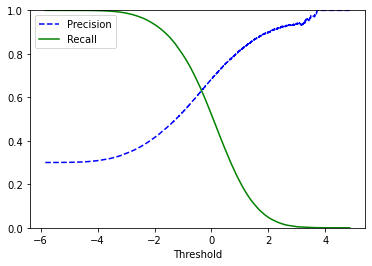

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  plt.xlabel("Threshold")
  plt.legend(loc="upper left")
  plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Sounds like recal of 0.54 is a good balanced number, no need for predict_proba()

**SGD Classifier**

In [ ]:
m_sgd = SGDClassifier(max_iter=5, tol=-np.infty,random_state=42) #  

m_sgd.fit(X_train_scaled, y_train)

cross_val_score(m_sgd, X_train_scaled, y_train, cv=7, scoring="recall")

array([0.53007794, 0.5403704 , 0.47105456, 0.46934017, 0.42827166,
       0.36142291, 0.34123838])

In [ ]:
pred_sgd =m_sgd.predict(X_test_scaled)

In [ ]:
f1_score(y_test, pred_sgd)

0.5702671770788114

In [ ]:
recall_score(y_test, pred_sgd)

0.48130301549940047

In [ ]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85    209932
           1       0.70      0.48      0.57     90068

    accuracy                           0.78    300000
   macro avg       0.75      0.70      0.71    300000
weighted avg       0.77      0.78      0.77    300000



In [ ]:
# Tried MLPClassifier, RandomForestClassifier, ExtraTreesClassifier, KNeighborsClassifier, SVM 
#They took too long, 85% is not bad :)

**Let's see what hyperparameter could do with DTC**

In [ ]:
# took too long
# now commenting it to run pipeline #'#


my_max_depth = [20, 30, 35] # eliminate other numbers after we know the result is 6 to eliminate time
my_min_samples_leaf = [120, 130, 140]  # eliminate other numbers after we know the result is 6 to eliminate time
my_criterion = ['gini', 'entropy']
random_state=[42]

param_grid_dtc = dict(max_depth = my_max_depth,
                  min_samples_leaf = my_min_samples_leaf,
                  criterion = my_criterion,
                  random_state=random_state)

grid_dtc = GridSearchCV(estimator = tree.DecisionTreeClassifier(), #DTC
                    param_grid=param_grid_dtc,
                    scoring='recall',
                    verbose=1,
                    n_jobs=-1)

In [ ]:
grid_result_dtc = grid_dtc.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 24.5min finished


In [ ]:
print('Best Score: ', grid_result_dtc.best_score_)
print('Best Params: ', grid_result_dtc.best_params_)

Best Score:  0.5365534470057841
Best Params:  {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 130, 'random_state': 42}


In [ ]:
best_pred_dtc = grid_result_dtc.predict(X_test_scaled)

In [ ]:
f1_score(y_test, best_pred_dtc)

0.6015179324371248

In [ ]:
recall_score(y_test, best_pred_dtc)

0.538526446684727

In [ ]:
print(classification_report(y_test, best_pred_dtc))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85    209932
           1       0.68      0.54      0.60     90068

    accuracy                           0.79    300000
   macro avg       0.75      0.72      0.73    300000
weighted avg       0.78      0.79      0.78    300000



***Greate result, best recall in all models (after hyperparameters), we will use these results in our Pipeline.***



**Let's see what hyperparameter could do with SGD**

In [ ]:
# took too long
# now commenting it to run pipeline #'#


loss = ['hinge', 'log', 'modified_huber', 'squared_hinge'] #'# to be added later "want it to be faster"
alpha = [0.003, 0.004, 0.005]
penalty = ['l1','l2', 'elasticnet', 'none'] #'# to be added later "want it to be faster"
random_state=[42]

param_grid_sgd = dict(penalty=penalty,
                  loss=loss,
                  alpha=alpha,
                  random_state=random_state)

grid_sgd = GridSearchCV(estimator=SGDClassifier(max_iter=5, tol=-np.infty), #logistic
                    param_grid=param_grid_sgd,
                    scoring='recall',
                    verbose=1,
                    n_jobs=-1)
grid_result_sgd = grid_sgd.fit(X_train_scaled, y_train)

print('Best Score: ', grid_result_sgd.best_score_)
print('Best Params: ', grid_result_sgd.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  6.3min finished


Best Score:  0.6185396900163516
Best Params:  {'alpha': 0.004, 'loss': 'squared_hinge', 'penalty': 'l1', 'random_state': 42}


In [ ]:
best_pred_sgd = grid_result_sgd.predict(X_test_scaled)

In [ ]:
f1_score(y_test, best_pred_sgd)

0.5339316798558043

In [ ]:
recall_score(y_test, best_pred_sgd)

0.48018164053825996

In [ ]:
print(classification_report(y_test, best_pred_sgd))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83    209932
           1       0.60      0.48      0.53     90068

    accuracy                           0.75    300000
   macro avg       0.70      0.67      0.68    300000
weighted avg       0.74      0.75      0.74    300000



**Let's see hyper parameter for the best modele, LogisticRegression**

In [ ]:

penalty = ['l1', 'l2']
C = [2,3,4]
solver = ['liblinear', 'saga']
random_state=[42]

param_grid_lg = dict(penalty=penalty,
                  C=C,
                  solver=solver,
                  random_state=random_state)
grid_lg = GridSearchCV(estimator=LogisticRegression(), #logistic
                      param_grid=param_grid_lg,
                      scoring='recall',
                      verbose=1,
                      n_jobs=-1)
grid_result_lg = grid_lg.fit(X_train_scaled, y_train)

print('Best Score: ', grid_result_lg.best_score_)
print('Best Params: ', grid_result_lg.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 26.4min finished


Best Score:  0.5207177558197772
Best Params:  {'C': 3, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}


In [ ]:
best_pred_lg = grid_result_lg.predict(X_test_scaled)

In [ ]:
f1_score(y_test, best_pred_lg)

0.5930382737438966

In [ ]:
recall_score(y_test, best_pred_lg)

0.5225496291690722

In [ ]:
print(classification_report(y_test, best_pred_lg))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85    209932
           1       0.69      0.52      0.59     90068

    accuracy                           0.78    300000
   macro avg       0.75      0.71      0.72    300000
weighted avg       0.78      0.78      0.78    300000



***a balanced recall is about 0.54 with 0.68 precision and 0.79 accuracy for DTC, this is what we will use for our pipeline***

**Pipeline**


Pipelines steps
1. Data Preprocessing by using One hot encoding
2. Data Preprocessing by using Max Abs Scaler
3. Apply LogisticRegression with choosen params

In [ ]:
# pipeline in progress


#Below is creating a pipeline with 3 steps
m_final_pipe = Pipeline([
        
        ('OHE', OneHotEncoder(handle_unknown="ignore")),
        ("scaler", MaxAbsScaler()),
        ("m_lg_best", tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= 30, min_samples_leaf= 130, random_state=42)) #SGDClassifier(alpha = 0.009, loss= 'modified_huber', penalty= None,max_iter=5, tol=-np.infty,random_state=42)) #LogisticRegression(C= 1, class_weight= {1: 0.6, 0: 0.4}, penalty= 'l1', solver= 'liblinear', random_state=0))
    ])


In [ ]:
m_final_pipe.fit(X_train_scaled, y_train)

Pipeline(memory=None,
         steps=[('OHE',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', sparse=True)),
                ('scaler', MaxAbsScaler(copy=True)),
                ('m_lg_best',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='entropy', max_depth=30,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=130,
                                        min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=42,
                                        spli

In [ ]:
final_pred = m_final_pipe.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, final_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85    209932
           1       0.67      0.52      0.58     90068

    accuracy                           0.78    300000
   macro avg       0.74      0.70      0.72    300000
weighted avg       0.77      0.78      0.77    300000

